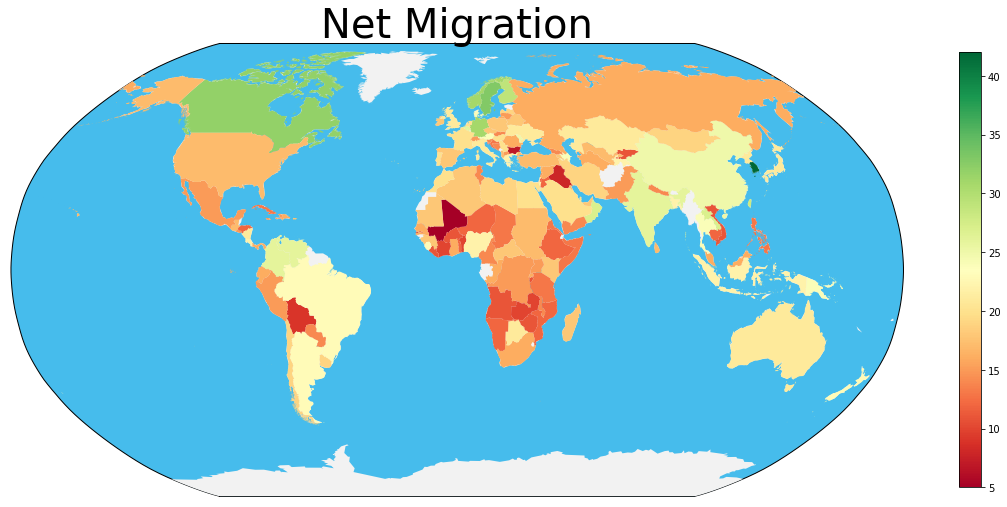

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

fig, ax = plt.subplots(figsize=(20,40))

m = Basemap(resolution='c', # c, l, i, h, f or None
            projection='robin',
            lon_0=0)

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
# m.drawcoastlines()

# m.drawparallels(np.arange(-90.,120.,30.))
# m.drawmeridians(np.arange(0.,360.,60.))
# m.drawmapboundary(fill_color='aqua')
plt.title("Net Migration",fontsize=40)

m.readshapefile('World/World', 'world',drawbounds=False)

df_plot = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.world],
        'area': [area['NAME'] for area in m.world_info]
    })

# print (df_plot)

result = pd.read_csv('output.csv')

# print (result)

df_plot = df_plot.merge(result, on='area', how='left')

# df_plot = df_plot.fillna(0)

df_plot = df_plot.dropna()

# print (df_plot)

cmap = plt.get_cmap('RdYlGn')   
pc = PatchCollection(df_plot.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_plot['value'].values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_plot['value'])
plt.colorbar(mapper, shrink=0.2)

# fig = plt.gcf()
# fig.savefig("Map.jpg")

plt.show()